
# Project: Data Analysis on TMDB Movies



## Shakhawat Hassan   



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is a data analysis on Hollywood movies. Before I analyze the datasets, I have to do data wrangling first, and then I am able to see the trends in genres by doing data visualization. These are the questions I will be answering on this data analysis. 
 
 > Which movies earned the most? Which genres are more popular than other genres? Which properties generated the most revenues? Which genres are performing well over the years? Which are the 10 highest-grossing movies of all time? 

#### Data Inspection

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
#importing the tmdb-movies.csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [51]:
df.info() #Inspecting data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [52]:
df.columns    #inspecting columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [53]:
#I see there are 21 columns and columns will be cleaned

In [54]:
df.describe() ##inspecting stats

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [55]:
df.shape

(10866, 21)

In [56]:
#Theree are 10866 rows and 21 columns

<a id='wrangling'></a>
## Data Wrangling

#### Data Cleaning

In [57]:
df.drop(['id', 'popularity', 'imdb_id', 'homepage', 'tagline', 'keywords','overview', 'production_companies', 'vote_count', 'vote_average', 'release_date'], axis=1, inplace=True)

In [58]:
#I dropped the unnecessary columns

In [59]:
df.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [60]:
df.isnull().sum()       #nulls checking

budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [61]:
df.dropna(inplace =True)

In [62]:
df.info()   # rows and columns checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10732 non-null  int64  
 1   revenue         10732 non-null  int64  
 2   original_title  10732 non-null  object 
 3   cast            10732 non-null  object 
 4   director        10732 non-null  object 
 5   runtime         10732 non-null  int64  
 6   genres          10732 non-null  object 
 7   release_year    10732 non-null  int64  
 8   budget_adj      10732 non-null  float64
 9   revenue_adj     10732 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 922.3+ KB


In [63]:
df.query('budget== "0"').count()    # data source suggests that 0 equals to empty or null value

budget            5578
revenue           5578
original_title    5578
cast              5578
director          5578
runtime           5578
genres            5578
release_year      5578
budget_adj        5578
revenue_adj       5578
dtype: int64

In [64]:
df = df.drop(df[df.budget ==0].index)    #dropping the null value

In [65]:
df.query('revenue == "0"').count()  # data source suggests that 0 equals to empty or null value

budget            1304
revenue           1304
original_title    1304
cast              1304
director          1304
runtime           1304
genres            1304
release_year      1304
budget_adj        1304
revenue_adj       1304
dtype: int64

In [66]:
df = df.drop(df[df.revenue ==0].index)   # dropping the null value

In [67]:
# Splitting the rows which carry "|"                              # source overstackflow

#Split Function
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [68]:
#genres split
df_genres = splitDataFrameList(df, 'genres', '|')

In [69]:
#director split
df_director=  splitDataFrameList(df, 'director', '|')

In [70]:
#cast split
df_cast =  splitDataFrameList(df, 'cast', '|')

In [71]:
df.info()               #Multiples of columns have "NaN" values which I will drop them next

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3850 non-null   int64  
 1   revenue         3850 non-null   int64  
 2   original_title  3850 non-null   object 
 3   cast            3850 non-null   object 
 4   director        3850 non-null   object 
 5   runtime         3850 non-null   int64  
 6   genres          3850 non-null   object 
 7   release_year    3850 non-null   int64  
 8   budget_adj      3850 non-null   float64
 9   revenue_adj     3850 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 330.9+ KB


In [72]:
df.dropna(inplace = True)   #dropping the "NaN" values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3850 non-null   int64  
 1   revenue         3850 non-null   int64  
 2   original_title  3850 non-null   object 
 3   cast            3850 non-null   object 
 4   director        3850 non-null   object 
 5   runtime         3850 non-null   int64  
 6   genres          3850 non-null   object 
 7   release_year    3850 non-null   int64  
 8   budget_adj      3850 non-null   float64
 9   revenue_adj     3850 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 330.9+ KB


In [73]:
df.isnull().sum()                ##There are no nulls!

budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [74]:
df.duplicated().sum()          #There is only one duplicate

1

In [75]:
df.drop_duplicates().shape    #dropped the duplicate here

(3849, 10)

In [76]:
df.info()    #looking for data type which needs to be changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3850 non-null   int64  
 1   revenue         3850 non-null   int64  
 2   original_title  3850 non-null   object 
 3   cast            3850 non-null   object 
 4   director        3850 non-null   object 
 5   runtime         3850 non-null   int64  
 6   genres          3850 non-null   object 
 7   release_year    3850 non-null   int64  
 8   budget_adj      3850 non-null   float64
 9   revenue_adj     3850 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 330.9+ KB


In [77]:
#change the data type
## chaning the budget into float as budget_adj is float
## chaning the revenue into float as revenue_adj is float
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)


In [78]:
df.info()     #data type looks great now, there are 3850 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3850 non-null   float64
 1   revenue         3850 non-null   float64
 2   original_title  3850 non-null   object 
 3   cast            3850 non-null   object 
 4   director        3850 non-null   object 
 5   runtime         3850 non-null   int64  
 6   genres          3850 non-null   object 
 7   release_year    3850 non-null   int64  
 8   budget_adj      3850 non-null   float64
 9   revenue_adj     3850 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 330.9+ KB


### Summary of Data Cleaning

#### After loading the datasets, I make the following changes!
##### 1) Drop the unnecessary columns which are not useful ('id', 'popularity', 'imdb_id', 'homepage', 'tagline', 'keywords','overview', 'production_companies', 'vote_count', 'vote_average', 'release_date')
##### 2) Drop null values for casts (76), genres(23), and directors (44). Because null values don't give us anything.
##### 3) Remove the rows of revenue and budget which contain '0', meaning they do not convey valid arguments.
##### 4) Split the rows which carry "|" for multiple names.
##### 5) Drop the values which carry "NaN" values, they do not contain any useful information.
##### 6) Drop a duplicate value.
##### 7) Changing the data type from int to float for budget and revenue as revenue_adj or budget_adj
##### After making these changes, I now have 3850 rows and 10 columns (past 10866 rows and 21 columns). 

<a id='eda'></a>
# Exploratory Data Analysis

## Statistical Findings

### Revenue
#### Which are the top 10 movies with highest revenue?

In [79]:
df.nlargest(10, ['revenue'])

,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
1386,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009,2.408869e+08,2.827124e+09
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
5231,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997,2.716921e+08,2.506406e+09
4361,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012,2.089437e+08,1.443191e+09
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09
14,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,2015,2.575999e+08,1.292632e+09
3374,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,2011,1.211748e+08,1.287184e+09
5422,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,2013,1.404050e+08,1.192711e+09
5425,200000000.0,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,Action|Adventure|Science Fiction,2013,1.872067e+08,1.137692e+09


Here is the top 10 list which movies got the highest revenue among all the movies

In [80]:
max_rev= df['revenue'].max()    #looking for max revenue
max_rev

2781505847.0

The highest grossing movie is Avatar and its revenue about 2.78B

In [81]:
df.revenue.mean() # mean of revenue

107787058.93246754

#### Statistic

In [82]:
df.describe() #statistic

,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,3.724698e+07,1.077871e+08,109.212987,2001.260519,4.428989e+07,1.371959e+08
std,4.221167e+07,1.766030e+08,19.913488,11.285056,4.480837e+07,2.161848e+08
min,1.000000e+00,2.000000e+00,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,1.000000e+07,1.363273e+07,95.000000,1995.000000,1.317218e+07,1.841498e+07
50%,2.400000e+07,4.488472e+07,106.000000,2004.000000,3.004524e+07,6.179073e+07
75%,5.000000e+07,1.242969e+08,119.000000,2010.000000,6.072867e+07,1.633775e+08
max,4.250000e+08,2.781506e+09,338.000000,2015.000000,4.250000e+08,2.827124e+09


### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002346A8750A0>,
      dtype=object)

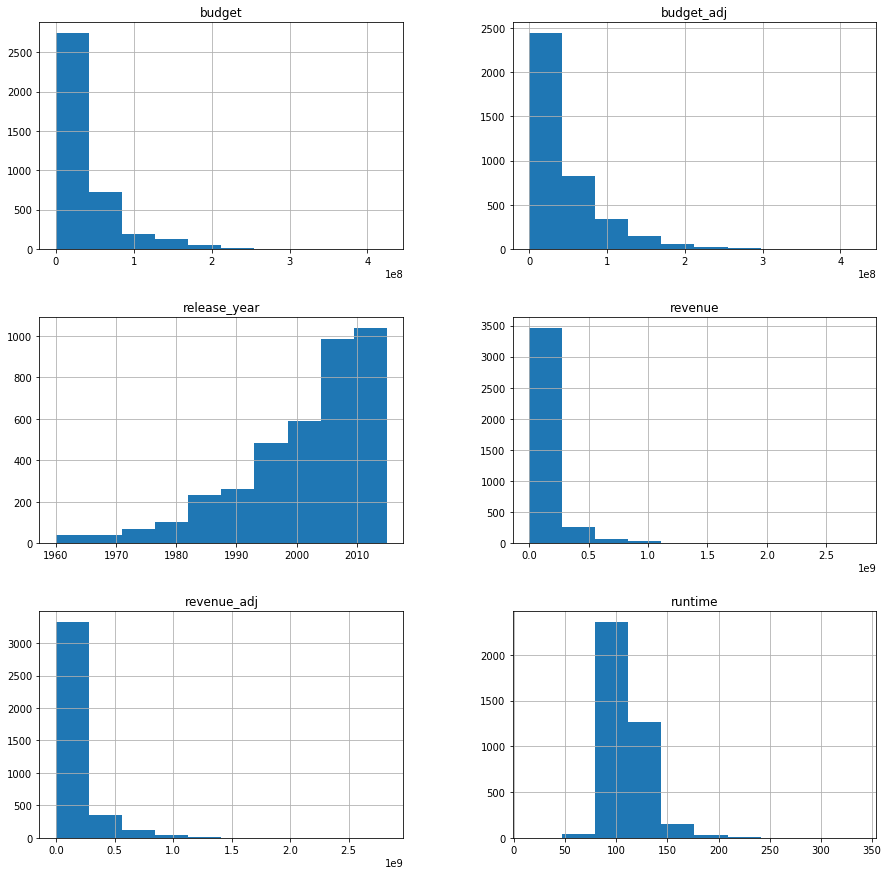

In [83]:
df.hist(figsize =(15,15))   #Historgram of budget, budget_adj, relase_year, revenue, revenue_adj, and runtime

### Which genres are most popular from year to year?

Top 5 Genres

In [84]:
#which genres earned the most
df_genre = df_genres.copy().groupby(['genres','release_year']).sum()

print (df_genre.query('release_year == 2010').idxmax())
print (df_genre.query('release_year == 2011').idxmax())
print (df_genre.query('release_year == 2012').idxmax())
print (df_genre.query('release_year == 2013').idxmax())
print (df_genre.query('release_year == 2014').idxmax())
print (df_genre.query('release_year == 2015').idxmax())

budget            (Action, 2010)
revenue        (Adventure, 2010)
runtime            (Drama, 2010)
budget_adj        (Action, 2010)
revenue_adj    (Adventure, 2010)
dtype: object
budget            (Action, 2011)
revenue        (Adventure, 2011)
runtime            (Drama, 2011)
budget_adj        (Action, 2011)
revenue_adj    (Adventure, 2011)
dtype: object
budget            (Action, 2012)
revenue        (Adventure, 2012)
runtime            (Drama, 2012)
budget_adj        (Action, 2012)
revenue_adj    (Adventure, 2012)
dtype: object
budget            (Action, 2013)
revenue        (Adventure, 2013)
runtime            (Drama, 2013)
budget_adj        (Action, 2013)
revenue_adj    (Adventure, 2013)
dtype: object
budget         (Action, 2014)
revenue        (Action, 2014)
runtime         (Drama, 2014)
budget_adj     (Action, 2014)
revenue_adj    (Action, 2014)
dtype: object
budget         (Adventure, 2015)
revenue        (Adventure, 2015)
runtime            (Drama, 2015)
budget_adj     (Adven

Genres with highest revenues are action, adventure, and drama.

In [85]:
df.revenue.mean() #mean of revenue

107787058.93246754

##### Revenue Over Time

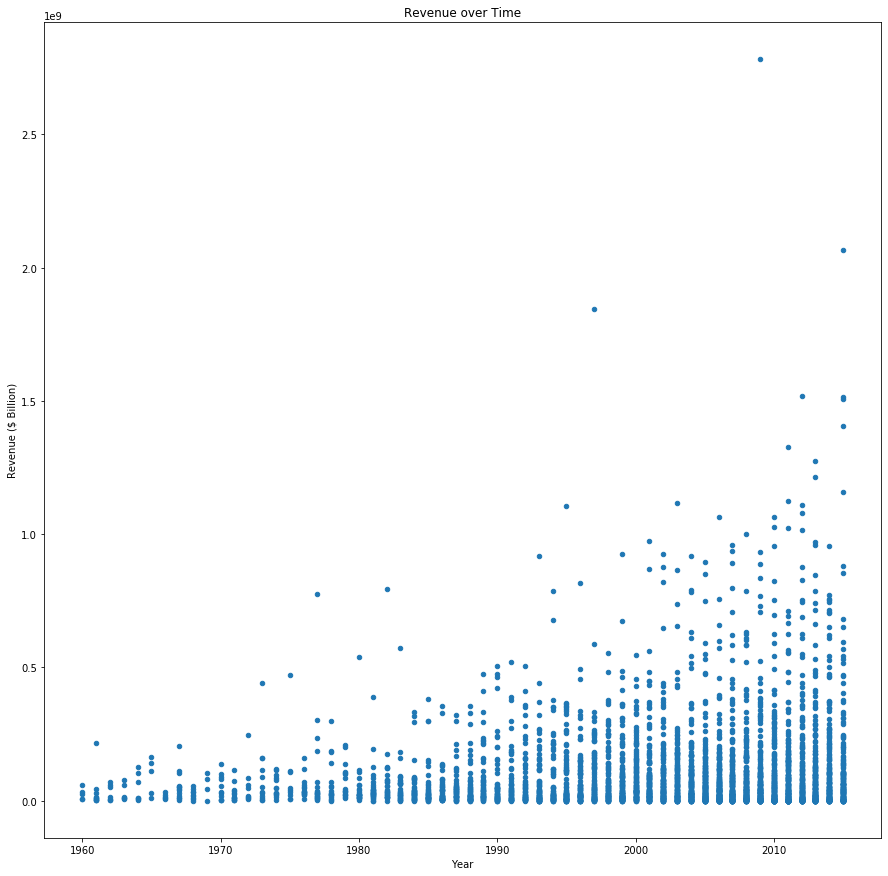

In [86]:
#plotting revenue over time

df.plot(x = 'release_year', y = 'revenue', kind = 'scatter', figsize = (15,15))
plt.xlabel ('Year')
plt.ylabel ('Revenue ($ Billion)')
plt.title ('Revenue over Time')
plt.show()

### What kinds of properties are associated with movies that have high revenues?

#### Top Genres

In [87]:
# copying the dataframe and group by genres and aggregate sum
#dropping the columns
df_genres_rev = df_genres.copy().groupby('genres', as_index =False).sum()
df_genres_rev.drop(['budget', 'budget_adj', 'runtime', 'revenue', 'release_year'], axis =1, inplace =True)

In [88]:
#plotting the bar graph for top genres

df_genres_rev = df_genres_rev.sort_values('revenue_adj', ascending =False)

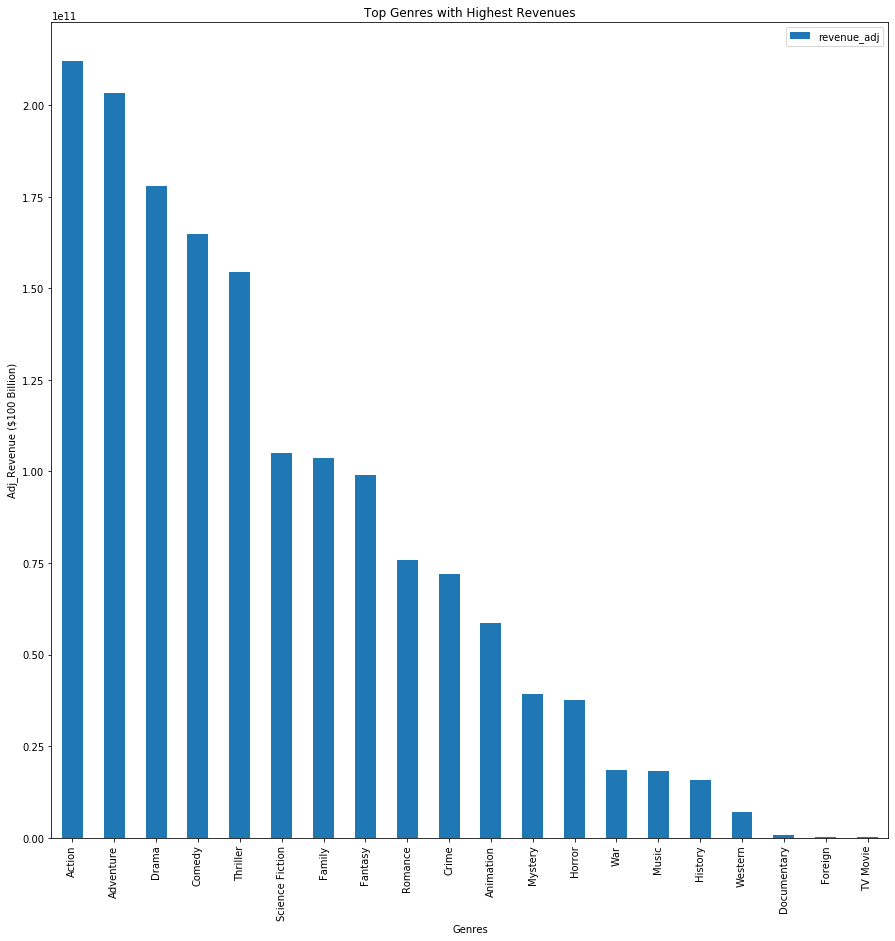

In [89]:

df_genres_rev.plot.bar(x = 'genres', y = 'revenue_adj', figsize = (15, 15))
plt.xlabel ('Genres')
plt.ylabel ('Adj_Revenue ($100 Billion)')
plt.title ('Top Genres with Highest Revenues')
plt.show()

#### Top Directors

In [90]:
# copying the dataframe and group by director and aggregate sum
#dropping the columns
df_dir_rev = df_director.copy().groupby('director', as_index =False).sum()
df_dir_rev.drop(['budget', 'budget_adj', 'runtime', 'revenue', 'release_year'], axis =1, inplace =True)

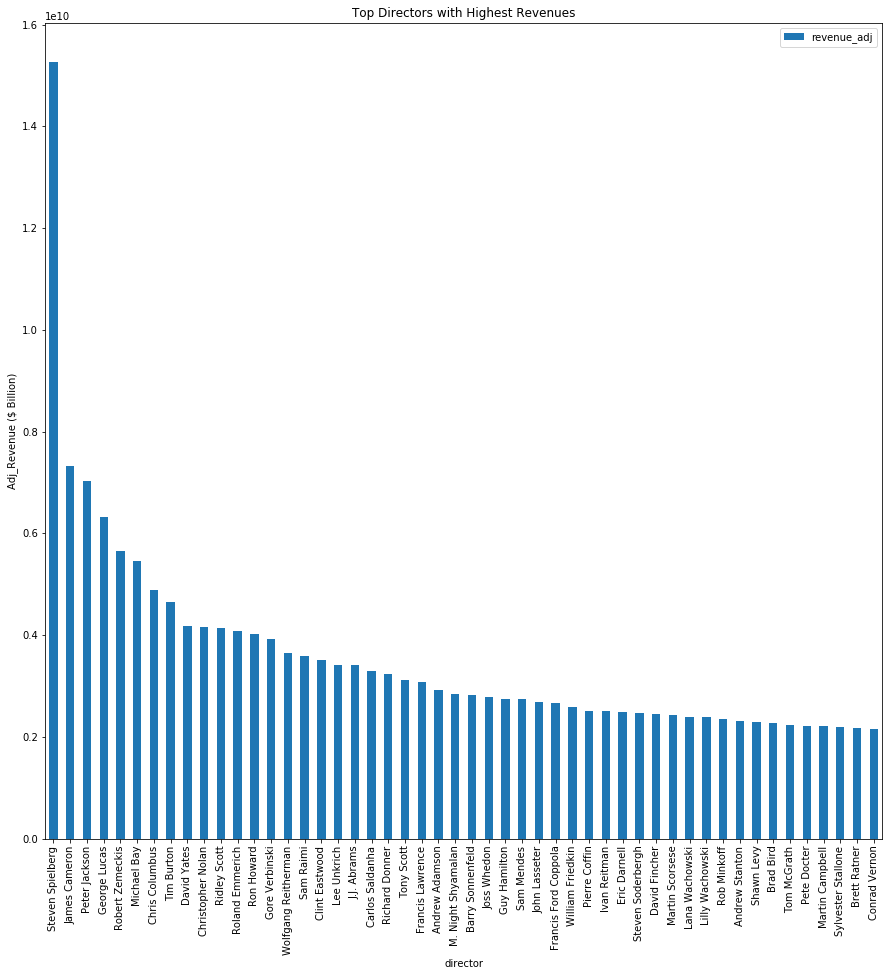

In [91]:
#plotting the bar graph for top directors
df_dir_rev = df_dir_rev.sort_values('revenue_adj', ascending =False). head(50)
df_dir_rev.plot.bar(x = 'director', y = 'revenue_adj', figsize = (15,15))
plt.xlabel ('director')
plt.ylabel ('Adj_Revenue ($ Billion)')
plt.title ('Top Directors with Highest Revenues')
plt.show()

#### Top Casts

In [92]:
# copying the dataframe and group by cast and aggregate sum
#dropping the columns
df_cast_rev = df_cast.copy().groupby('cast', as_index =False).sum()
df_cast_rev.drop(['budget', 'budget_adj', 'runtime', 'revenue', 'release_year'], axis =1, inplace =True)

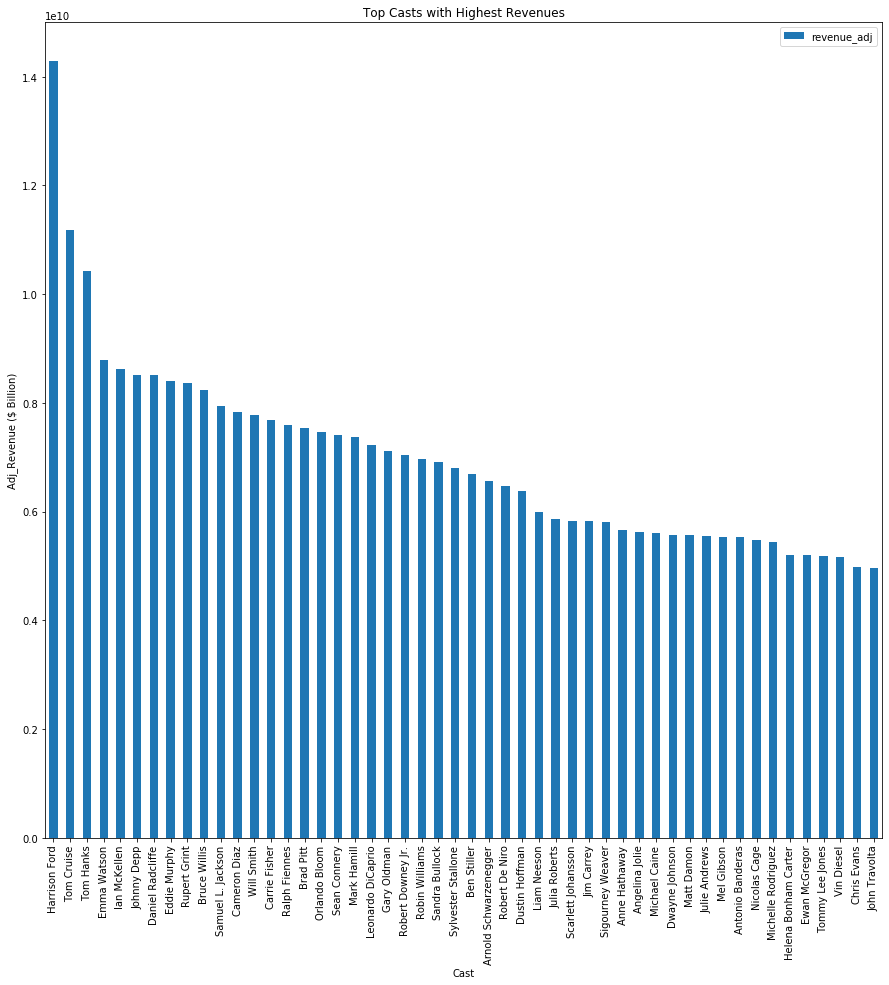

In [93]:
#plotting the bar graph for top casts
df_cast_rev = df_cast_rev.sort_values('revenue_adj', ascending =False). head(50)
df_cast_rev.plot.bar(x = 'cast', y = 'revenue_adj', figsize = (15,15))
plt.xlabel ('Cast')
plt.ylabel ('Adj_Revenue ($ Billion)')
plt.title ('Top Casts with Highest Revenues')
plt.show()

#### Correlation: Revenue vs. Budget

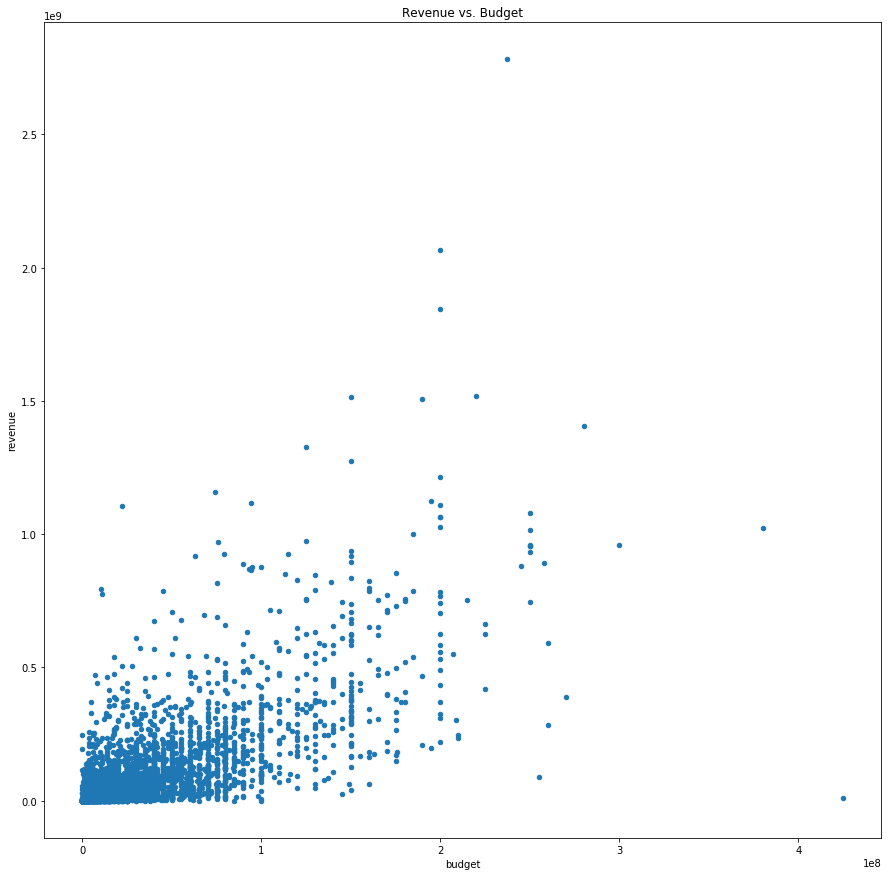

In [94]:
#looking for correlation beteen revenue and budget
df.plot(x = 'budget', y='revenue', kind = 'scatter', figsize = (15,15)) 
plt.title ("Revenue vs. Budget")
plt.show()

There is no correlation between budget and revenue. If there's then there's very little positive correlation.

#### Correlation: Revenue vs. Runtime

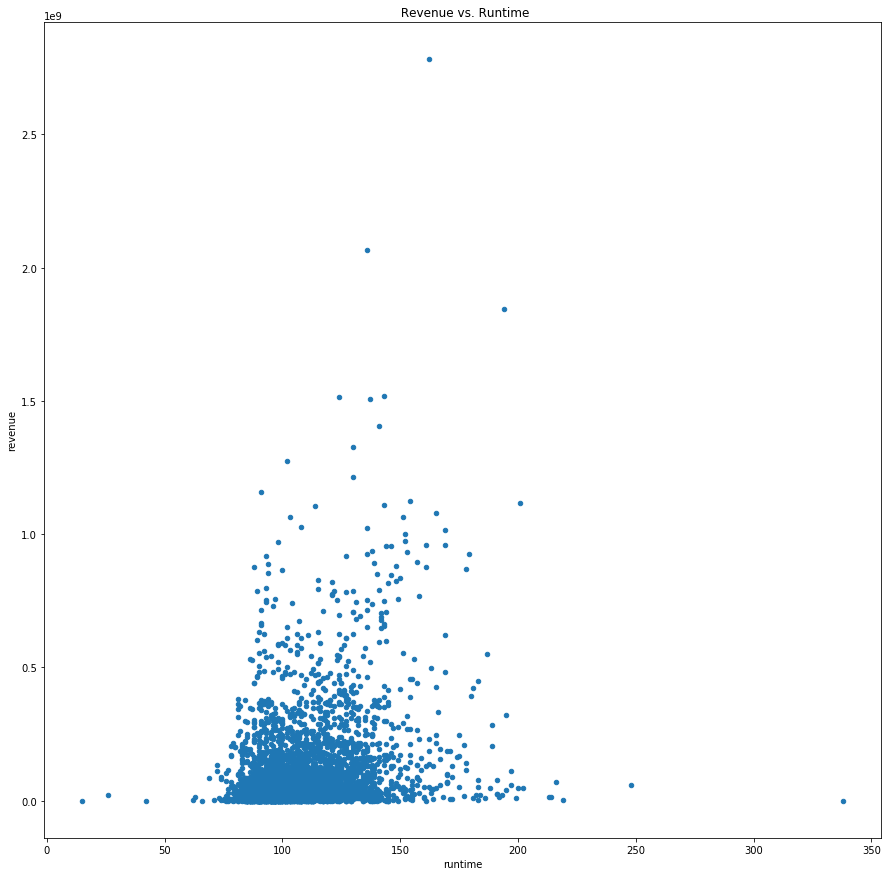

In [95]:
#look for correlation between revenue and runtime
df.plot(x = 'runtime', y='revenue', kind = 'scatter', figsize = (15,15)) 
plt.title (" Revenue vs. Runtime")
plt.show()

There is no correlation between runtime and revenue.

<a id='conclusions'></a>
## Conclusions

In the first section, I pulled up the TMDB movie datasets. Next, then I cleaned the data, fixed the data type, split the rows which carry "|", remove null values, and remove duplicate rows. Before cleaning the datasets, I had 10,866 rows and 21 columns. After cleaning the datasets, 

>
> In the exploratory section, I looked for the findings. For instance, action, adventure, drama, comedy, and thriller genres are most popular from year to year (1960-2015). Action and adventure take the highest place for genres. Avatar is the highest-grossing movie of all time (rev  2.78 Billion). Furthermore, The mean revenue was about 107 Million and the highest budget of a film was about 425 million. As the year goes on, the number of movies is increasing. 

>On the same hand, genres, casts, directors are the main properties that heavily depend on a film's revenue. For example, Avatar is an action-packed film which is directed by James Cameron, and it's the highest-grossing film of all time (as of 2015). Top 3 directors are Steven Spielberg, James Cameron, and Peter Jackson. Steven Spielberg is the number one director among all of them. Moreover, Harrison Ford, Tom Cruise, and Tom Hanks are the ones who have gotten the highest revenues. Lastly, there hasn't been any correlation found between budget and revenue, and revenue and runtime.

## Limitations

> I have used the TMDB movie dataset for this analysis. This dataset does not contain all movies which were released and the directors' names. Moreover, I didn't know how these movies performed internationally. I just know the total revenue of every movie. It would be great to know. One the same hand, most movies are missing values of revenues and budgets. Half of the rows have removed because of null values. If there were data for those who were missing, the graphs could have been skewed or flattened.

In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295